# Libraries

In [7]:
install.packages('kernlab')

Installing package into ‘/home/ggomarr/R/x86_64-pc-linux-gnu-library/3.3’
(as ‘lib’ is unspecified)


In [8]:
library(caTools)
library(ggplot2)
library(repr)
options(repr.plot.width=4,repr.plot.height=4)
library(ElemStatLearn)
library(kernlab)


Attaching package: ‘kernlab’

The following object is masked from ‘package:ggplot2’:

    alpha



# Read data

In [3]:
root_dir="~/Documents/Education/20170623 Udemy - Machine Learning A-Z: Hands-On Python and R in Data Science/"
work_dir="Course data/Part 9 - Dimensionality Reduction/Section 45 - Kernel PCA"
setwd(paste(root_dir,work_dir,sep=''))
df=read.csv('Social_Network_Ads.csv')[c('Age','EstimatedSalary','Purchased')]
str(df)

'data.frame':	400 obs. of  3 variables:
 $ Age            : num  19 35 26 27 19 27 27 32 25 35 ...
 $ EstimatedSalary: num  19000 20000 43000 57000 76000 58000 84000 150000 33000 65000 ...
 $ Purchased      : int  0 0 0 0 0 0 0 1 0 0 ...


# Scale

In [4]:
df[,names(df)!='Purchased']=scale(df[,names(df)!='Purchased'])
str(df)

'data.frame':	400 obs. of  3 variables:
 $ Age            : num  -1.78 -0.253 -1.112 -1.016 -1.78 ...
 $ EstimatedSalary: num  -1.488 -1.459 -0.784 -0.374 0.184 ...
 $ Purchased      : int  0 0 0 0 0 0 0 1 0 0 ...


# Train/test

In [6]:
set.seed(123)
split=sample.split(df$Purchased, SplitRatio=0.8)
training_set_all=subset(df,split)
test_set_all=subset(df,!split)
writeLines(noquote(paste('Training set:',paste(dim(training_set_all),collapse='x'))))
writeLines(noquote(paste('Test set:',paste(dim(test_set_all),collapse='x'))))

Training set: 320x3
Test set: 80x3


# Kernel PCA

In [11]:
kpca=kpca(~.,
          data=training_set_all[,names(training_set_all)!='Purchased'],
          kernel='rbfdot',
          features=2)
training_set=as.data.frame(predict(kpca,training_set_all))
training_set$Purchased=training_set_all$Purchased
test_set=as.data.frame(predict(kpca,test_set_all))
test_set$Purchased=test_set_all$Purchased
writeLines(noquote(paste('Training set:',paste(dim(training_set),collapse='x'))))
writeLines(noquote(paste('Test set:',paste(dim(test_set),collapse='x'))))

Training set: 320x3
Test set: 80x3


# Logistic Regression

In [12]:
range_plot_X=function(x,num,ext){
    delta=max(x)-min(x)
    return(seq(min(x)-ext*delta,max(x)+ext*delta,length.out=num))
}

In [18]:
X_plot=range_plot_X(training_set$V1,1000,0.1)
Y_plot=range_plot_X(training_set$V2,1000,0.1)
XY_grid=expand.grid(X_plot,Y_plot)
colnames(XY_grid)=c('V1','V2')

In [14]:
log_reg=glm(formula=Purchased~.,family=binomial,data=training_set)
writeLines('\nClassifier summary:')
print(summary(log_reg))


Classifier summary:

Call:
glm(formula = Purchased ~ ., family = binomial, data = training_set)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.9368  -0.4477  -0.1126   0.3050   2.4873  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.32297    0.21462  -6.164 7.08e-10 ***
V1           0.45035    0.05438   8.282  < 2e-16 ***
V2           0.22834    0.03634   6.283 3.33e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 416.79  on 319  degrees of freedom
Residual deviance: 199.17  on 317  degrees of freedom
AIC: 205.17

Number of Fisher Scoring iterations: 6



Confusion matrix (train):
   y_pred
      0   1
  0 196  10
  1  37  77


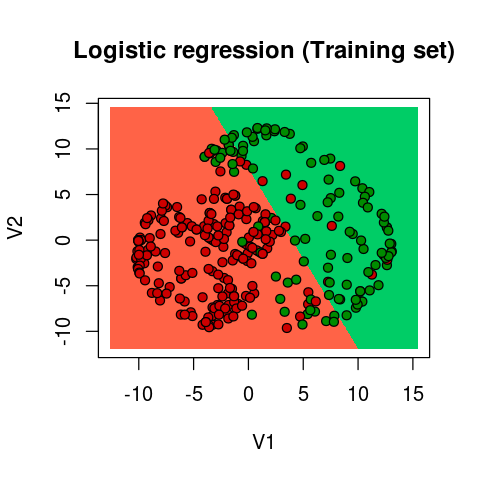

In [21]:
writeLines('Confusion matrix (train):')
prob_pred=predict(log_reg,newdata=training_set)
y_pred=ifelse(prob_pred>0.5,1,0)
print(table(training_set$Purchased,y_pred))
prob_pred_grid=predict(log_reg,newdata=XY_grid)
y_pred_grid=ifelse(prob_pred_grid>0.5,1,0)
plot(training_set[c('V1','V2')],
     main='Logistic regression (Training set)',
     xlab='V1',ylab='V2',
     xlim=range(X_plot),ylim=range(Y_plot))
contour(X_plot,Y_plot,matrix(as.numeric(y_pred_grid),length(X_plot),length(Y_plot)),add=TRUE)
points(XY_grid,pch='.',col=ifelse(y_pred_grid==1,'springgreen3','tomato'))
points(training_set[c('V1','V2')],pch=21,
       bg=ifelse(training_set$Purchased==1,'green4','red3'))

Confusion matrix (test):
   y_pred
     0  1
  0 45  6
  1  8 21


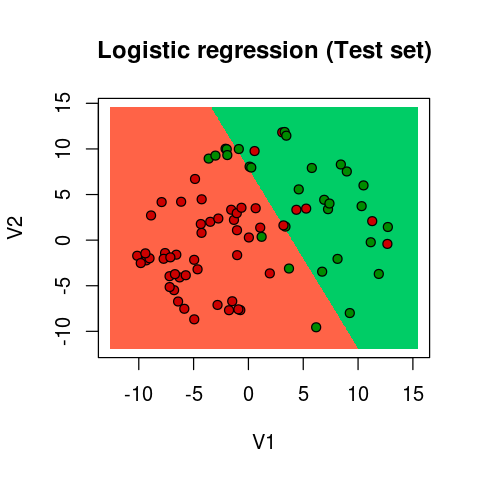

In [22]:
writeLines('Confusion matrix (test):')
prob_pred=predict(log_reg,newdata=test_set)
y_pred=ifelse(prob_pred>0.5,1,0)
print(table(test_set$Purchased,y_pred))
prob_pred_grid=predict(log_reg,newdata=XY_grid)
y_pred_grid=ifelse(prob_pred_grid>0.5,1,0)
plot(test_set[c('V1','V2')],
     main='Logistic regression (Test set)',
     xlab='V1',ylab='V2',
     xlim=range(X_plot),ylim=range(Y_plot))
contour(X_plot,Y_plot,matrix(as.numeric(y_pred_grid),length(X_plot),length(Y_plot)),add=TRUE)
points(XY_grid,pch='.',col=ifelse(y_pred_grid==1,'springgreen3','tomato'))
points(test_set[c('V1','V2')],pch=21,
       bg=ifelse(test_set$Purchased==1,'green4','red3'))